In [7]:
import sys
sys.path.append("../../helper")
from AnalysisHelper import helper

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb


import requests
import json
from pandas import DataFrame, to_datetime
import sys
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import DataFrame, MultiIndex, concat, DatetimeIndex
from matplotlib import pyplot as plt
sys.path.append("../../helper")
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dict
from matplotlib import pyplot as pyplot
from matplotlib import dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from tabulate import tabulate

from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima
import seaborn as sb

#from helper import set_datetime_index, exp_time_data


# 시계열 분석 연습문제

## 문제 2

다음의 데이터는 `1981년 01월`부터 `2023년 05월`까지 전국에서 출생한 신생아 수를 조사하여 시,도별로 표시한 자료의 일부이다.

| 시점        | 서울특별시  | 부산광역시 | 대구광역시 | 인천광역시 |
|-----------|--------|-------|-------|-------|
| 1981년 01월 | 21,461 | 7,846 | 3,547 | 2,886 |
| 1981년 02월 | 23,389 | 8,622 | 3,588 | 3,044 |
| 1981년 03월 | 15,042 | 6,284 | 2,885 | 2,456 |
| 1981년 04월 | 15,231 | 5,806 | 2,783 | 2,369 |
| 1981년 05월 | 16,239 | 6,225 | 2,808 | 2,468 |

전체 자료는 아래의 URL을 통해 내려받을 수 있다.

```plain
https://data.hossam.kr/E06/newborn.xlsx
```

이 데이터를 활용하여 조사기간동안 태어난 신생아 수가 어떻게 변화하고 있는지 ARIMA와 AUTO_ARIMA중 자신이 사용 가능한 방식 하나를 선정하여 분석하고 앞으로 5년간의 신생아 수를 예측한 자료를 시각화 하시오.

단, 조사되지 않은 항목에 대해서는 신생아수가 `0`인 것으로 간주한다.

In [6]:
df = read_excel("https://data.hossam.kr/E06/newborn.xlsx")
df.head()

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,1981년 01월,21461,7846,3547,2886,NaN,NaN,NaN,NaN,9685,3729,3002,6293,4956,8741,7454,7501,1050
1,1981년 02월,23389,8622,3588,3044,NaN,NaN,NaN,NaN,10352,3637,3161,7761,5326,8319,7446,8039,872
2,1981년 03월,15042,6284,2885,2456,NaN,NaN,NaN,NaN,7727,3158,2486,5214,3855,7566,6229,6714,805
3,1981년 04월,15231,5806,2783,2369,NaN,NaN,NaN,NaN,7321,3166,2230,4621,3634,6553,5548,6079,752
4,1981년 05월,16239,6225,2808,2468,NaN,NaN,NaN,NaN,7823,3234,2419,4879,3709,6564,5529,6222,821


In [ ]:
# 덧셈해서 맨 뒤에다가 뭐 놔야겠당


In [85]:
df.rename(columns={'날짜':'date', '평균기온(℃)':'temp'}, inplace=True)
df.head()

,temp
날짜,
1973-07-01,22.7
1973-07-02,23.8
1973-07-03,27.2
1973-07-04,25.2
1973-07-05,26.9


In [86]:
df.isna().sum() # 결측치 확인

temp    0
dtype: int64

결측치 수: 0


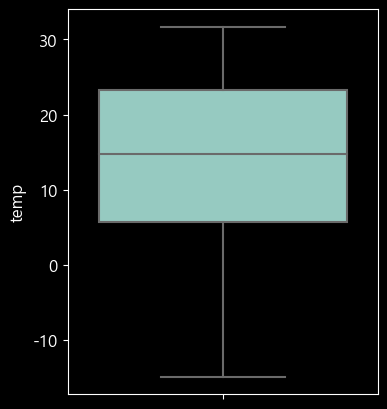

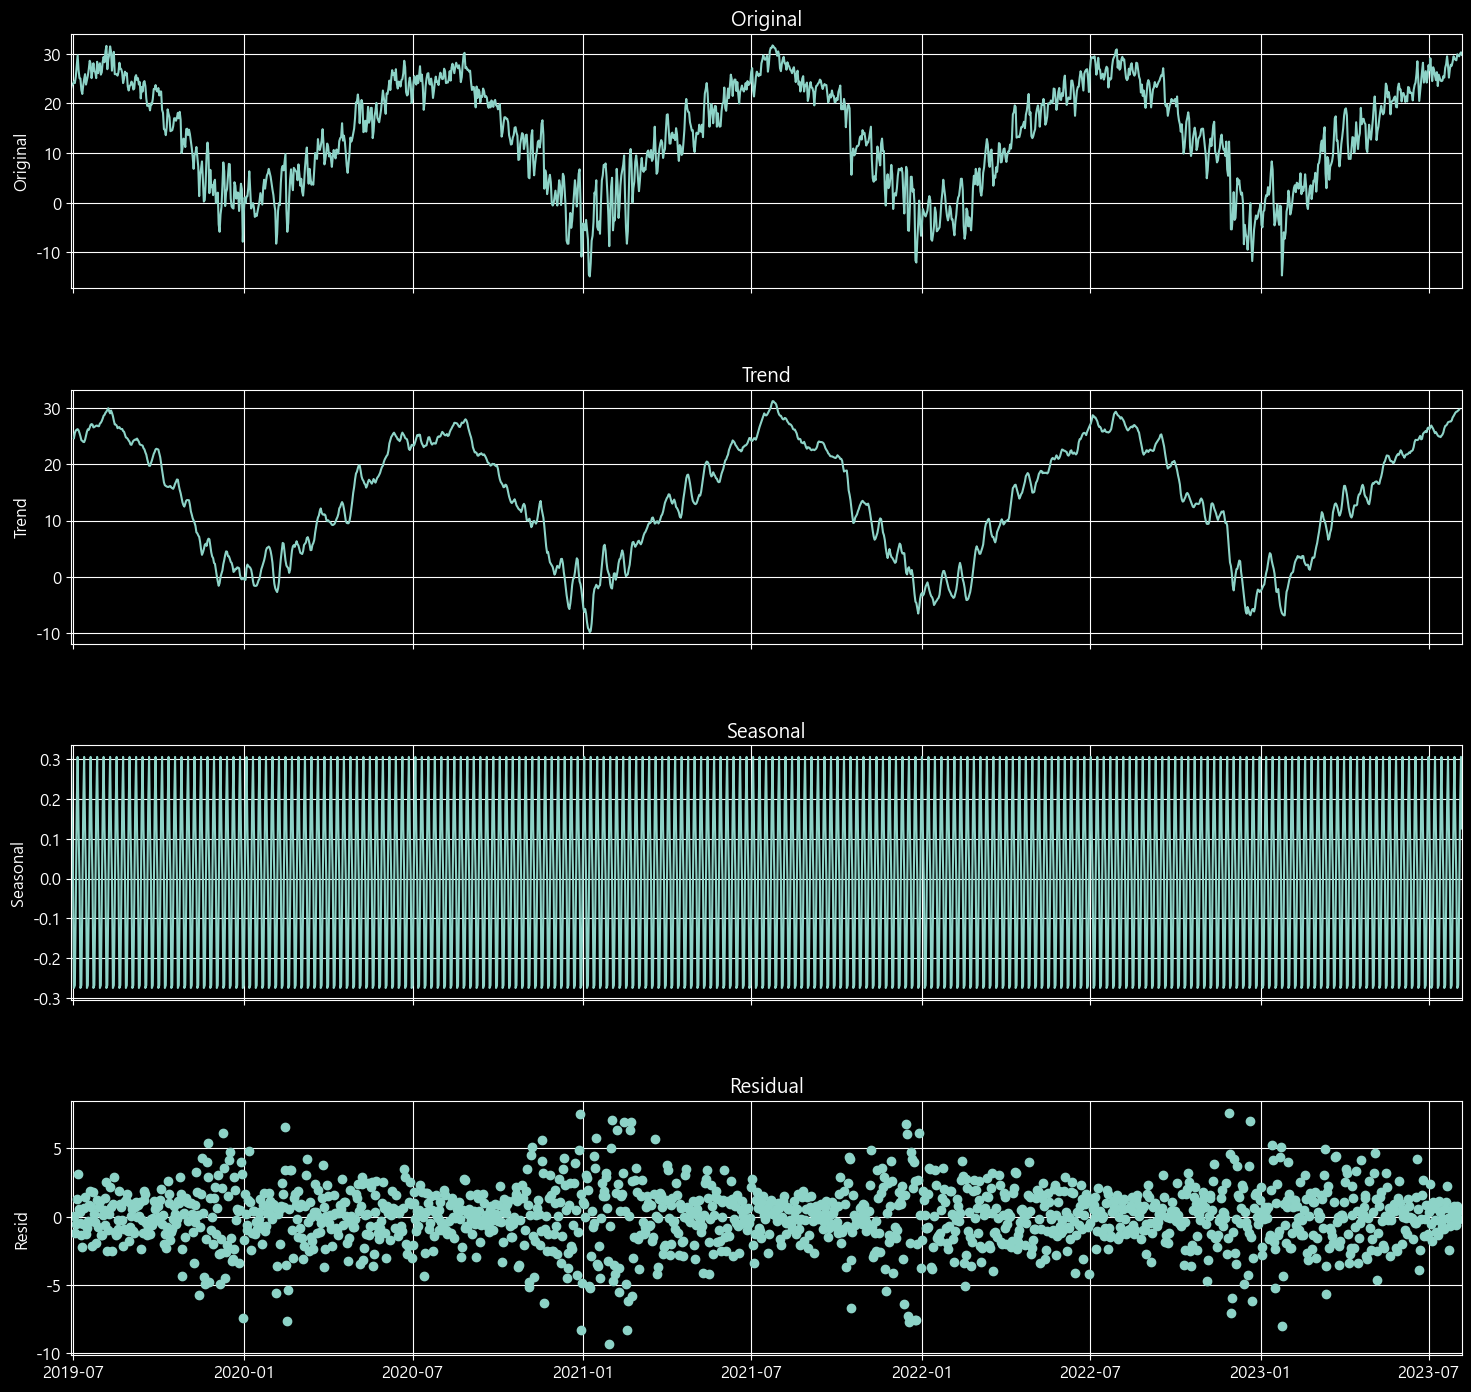

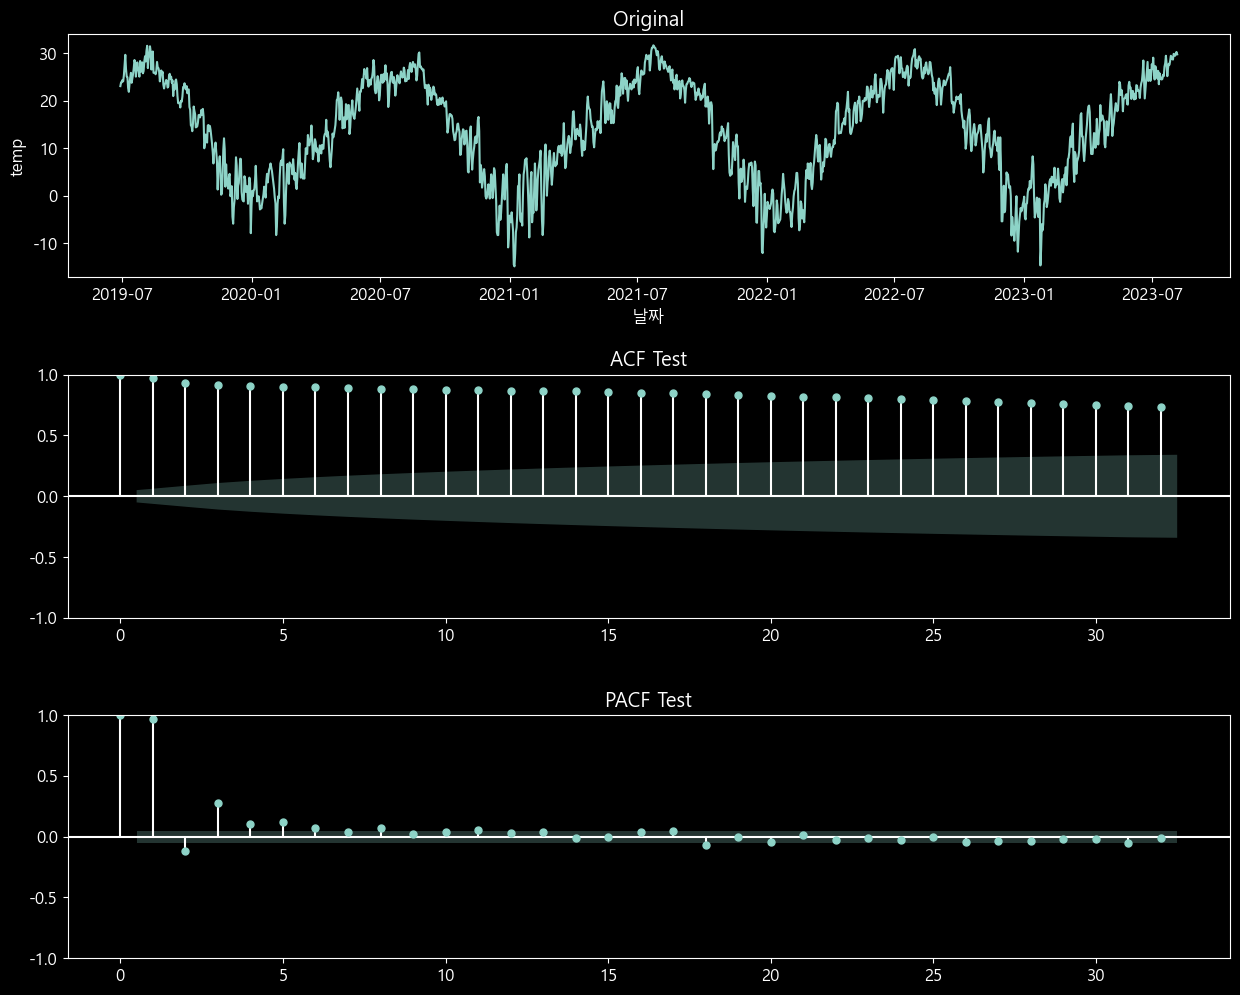

=========== 원본 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          | -1.68811 |
| 유의수준(p-value)                  |  0.43725 |
| 최적차수(num of lags)              |       17 |
| 관측치 개수(num of observations)   |     1482 |
| 기각값(Critical Values) 1%         | -3.43477 |
| 기각값(Critical Values) 5%         | -2.86349 |
| 기각값(Critical Values) 10%        | -2.56781 |
| 데이터 정상성 여부(0=Flase,1=True) |        0 |
+------------------------------------+----------+


In [87]:
helper.exp_time_data(data=df.tail(1500), yname='temp',sd_model='a')

In [88]:
# df2 = df['temp'].diff() # 차분
# df2.dropna()

In [89]:
# # 원본파일 그대로 저장하기
# df2.to_excel('1.xlsx')

In [90]:
# df2.head()

In [91]:
# df = read_excel("1.xlsx",index_col='날짜')
# df.head()

In [92]:
# df.dropna()

In [93]:
# helper.exp_time_data(data=df, yname='temp',sd_model='a')

검정통계량(ADF Statistic): -3.87741
ADF 통계량 값은 -3.87741로, 검정 결과 데이터의 정상성을 판단하는데 사용됩니다. 이 값이 임계값보다 낮으면 데이터가 정상성을 가지는 것으로 간주될 수 있습니다.
유의수준(p-value): 0.00220755
유의수준은 0.00220755로, 유의수준 0.05보다 작습니다. 이는 귀무가설을 기각하고 대립가설을 받아들일 충분한 근거가 됩니다. 즉, 데이터가 정상성을 가지지 않는다는 귀무가설을 기각하고, 정상성을 가진다는 대립가설을 채택할 수 있습니다.
최적차수(num of lags): 14
최적의 시차(lag) 수는 14로 결정되었습니다.
관측치 개수(num of observations): 587
분석에 사용된 관측치의 총 개수입니다.
기각값(Critical Values) 1%, 5%, 10%:
각 유의수준에 대한 기각값이 제공되었습니다. ADF 통계량 값이 이 기각값보다 낮으면 데이터가 정상성을 가진다고 볼 수 있습니다.
데이터 정상성 여부(0=Flase,1=True): 1
ADF 검정 결과에 따르면 데이터가 정상성을 가진다고 판단되었습니다.

In [94]:
model = ARIMA(df['temp'],order=(4,0,0),seasonal_order=(4,0,0,12))
fit = model.fit()
print(fit.summary())

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


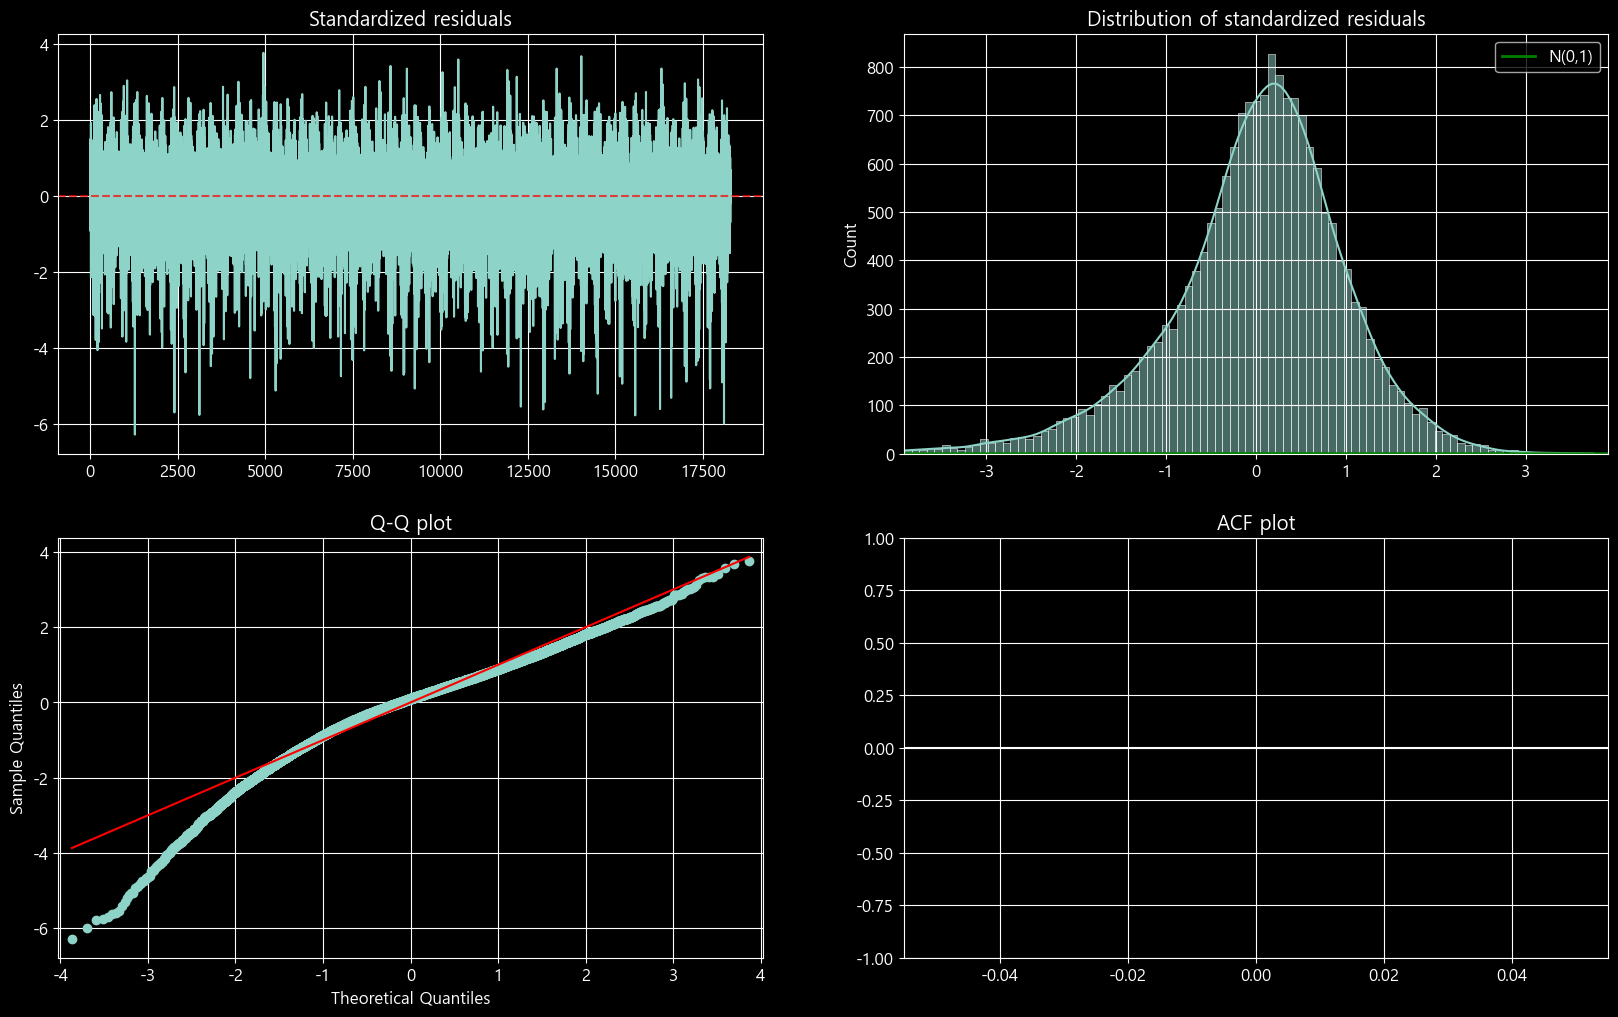

In [ ]:
# 잔차분석
helper.arima_diagnostics(fit.resid)

In [ ]:
fv = fit.fittedvalues
fv.head()


날짜
1973-07-01    0.000332
1973-07-02    0.000332
1973-07-03    0.088941
1973-07-04    0.055690
1973-07-05   -1.127880
dtype: float64

In [ ]:
fc = fit.forecast(30)
fc.head()

2023-08-07   -0.144614
2023-08-08    0.065690
2023-08-09    0.031433
2023-08-10    0.072003
2023-08-11    0.019974
Freq: D, Name: predicted_mean, dtype: float64

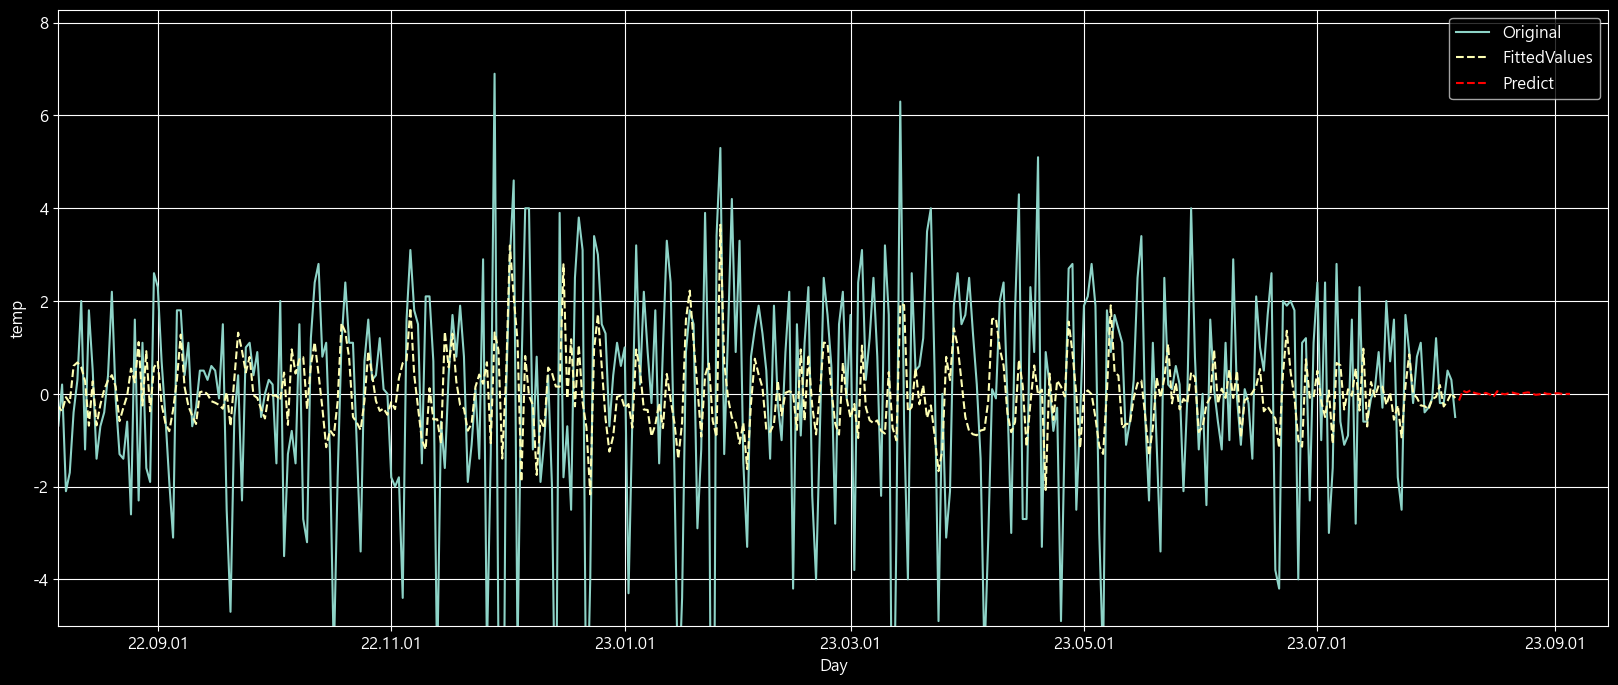

In [ ]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='temp', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Day')
plt.ylabel('temp')
plt.legend()

last = df.index.max()
xmin = last-timedelta(days=365)
xmax = last+timedelta(days=30+10)
ymax = df['temp'][xmin:xmax].max()

plt.xlim([xmin, xmax])
plt.ylim([-5, ymax*1.2])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

In [ ]:
my_p = 4    # AR의 차수 (검증한 결과를 활용)
my_d = 0    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 12    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['temp'],  # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=83167.808, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=83050.735, Time=1.80 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=83165.809, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=83049.450, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=81727.123, Time=0.60 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=81729.100, Time=2.60 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=81512.584, Time=0.78 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=81514.553, Time=3.89 sec
 ARIMA(4,0,0)(0,0,0)[12] intercept   : AIC=81198.443, Time=1.12 sec
 ARIMA(4,0,0)(1,0,0)[12] intercept   : AIC=81200.342, Time=4.28 sec
 ARIMA(4,0,0)(0,0,0)[12]             : AIC=81196.444, Time=0.53 sec
 ARIMA(4,0,0)(1,0,0)[12]             : AIC=81198.343, Time=1.82 sec
 ARIMA(3,0,0)(0,0,0)[12]             : AIC=81510.584, Time=0.34 sec

Best model:  ARIMA(4,0,0)(0,0,0)[12]          
Total fit time: 18.715 se

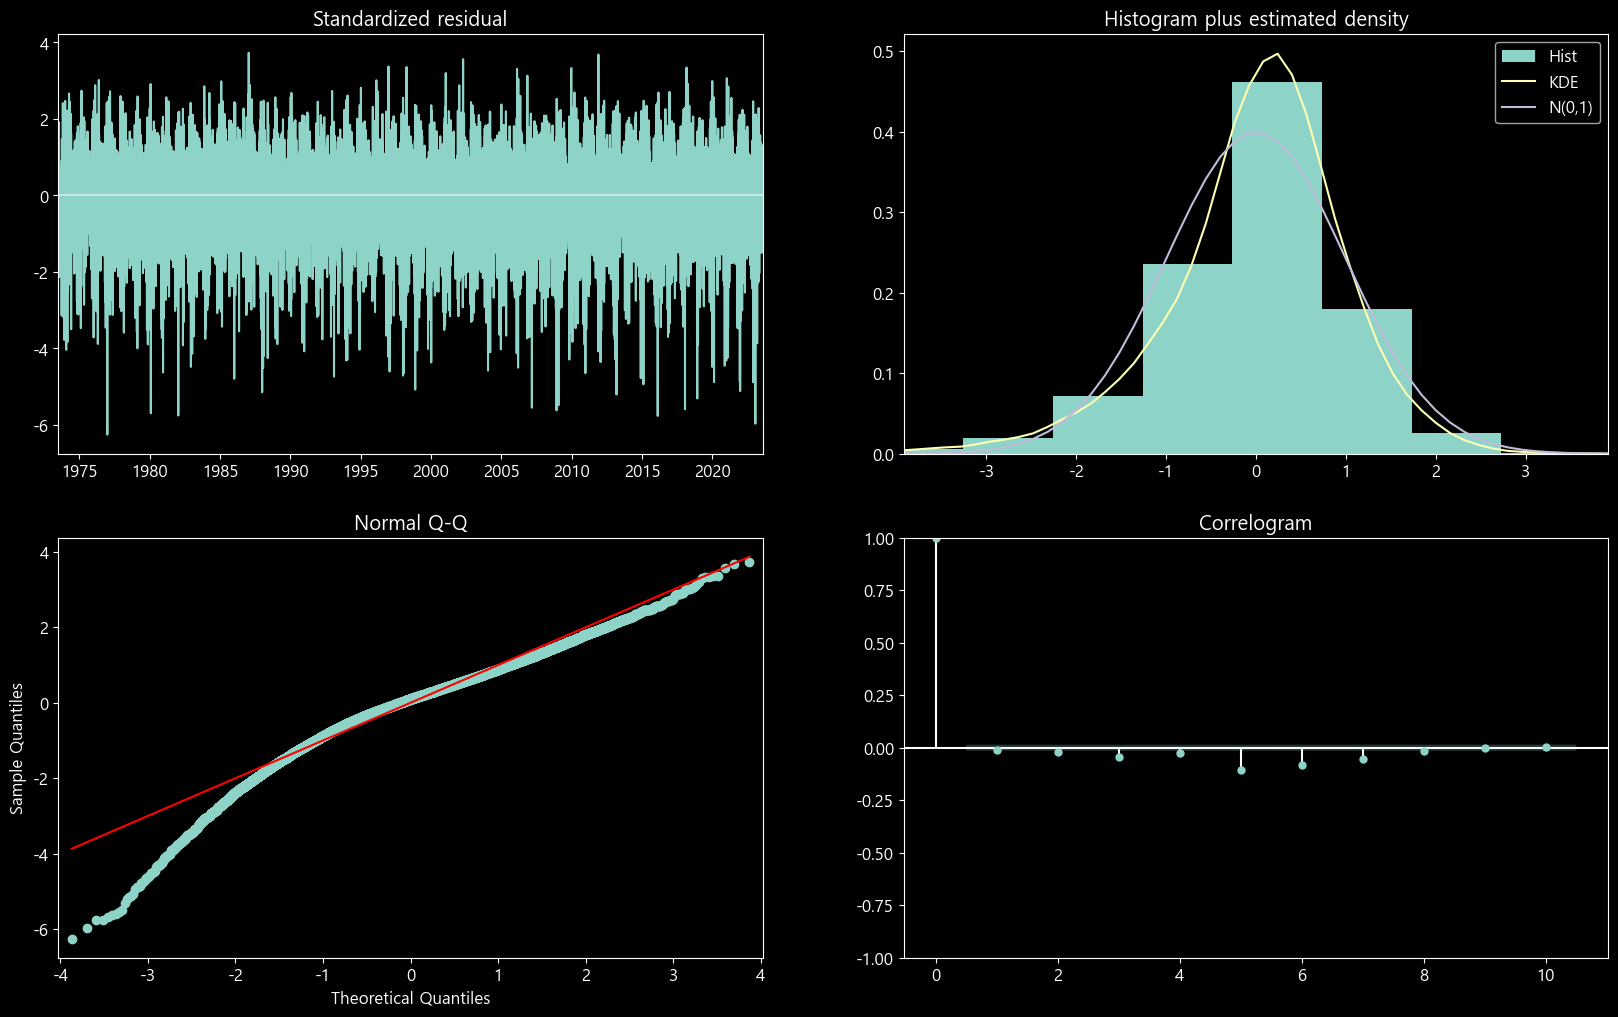

In [ ]:
model.plot_diagnostics(figsize=(20,12))
plt.show()
plt.close()

In [ ]:
fv = model.fittedvalues()
fv.head()

날짜
1973-07-01    0.000000
1973-07-02    0.000000
1973-07-03    0.089056
1973-07-04    0.057344
1973-07-05   -1.127328
dtype: float64

In [ ]:
fc = model.predict(n_period=30)
fc.head()

2023-08-07   -0.138856
2023-08-08    0.039788
2023-08-09    0.052255
2023-08-10    0.070877
2023-08-11    0.003501
Freq: D, dtype: float64

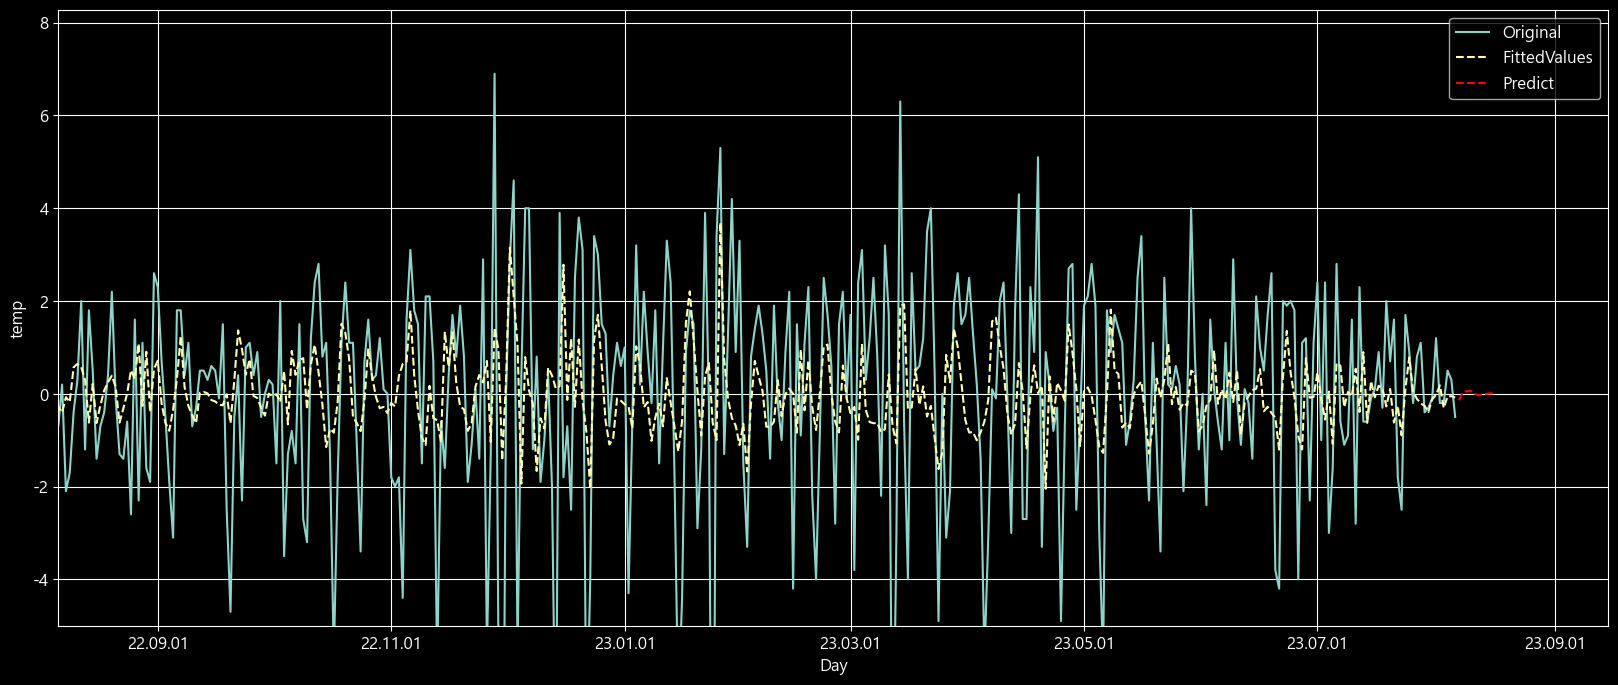

In [ ]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='temp', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Day')
plt.ylabel('temp')
plt.legend()

last = df.index.max()
xmin = last-timedelta(days=365)
xmax = last+timedelta(days=30+10)
ymax = df['temp'][xmin:xmax].max()

plt.xlim([xmin, xmax])
plt.ylim([-5, ymax*1.2])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()